In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Information about the data
info = pd.read_csv("./ml-100k/u.info", sep=" ", header=None)
info.columns=['Counts', 'Type']
info

,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


In [3]:
#Types of genres
genre = pd.read_csv('./ml-100k/u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [4]:
#Types of occupations
occupation = pd.read_csv('./ml-100k/u.occupation', sep="|", encoding='latin-1', header=None)
occupation.columns = ['Occupations']
occupation_list = list(occupation['Occupations'])
occupation_list

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [5]:
#Load the Ratings data
data = pd.read_csv('./ml-100k/u.data', sep="\t", header=None)
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
data.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [7]:
data.shape

(100000, 4)

In [8]:
data['movie id'].unique().shape # Total number of movies is 1682 only

(1682,)

In [9]:
data.duplicated().value_counts()

False    100000
dtype: int64

In [10]:
#Load the Movies data
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
item['release date'] = pd.to_datetime(item['release date'])

In [12]:
item['year'] = item['release date'].dt.year

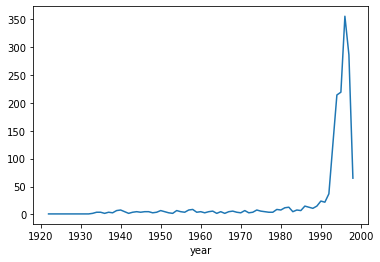

In [13]:
item.groupby('year')['movie id'].count().plot()

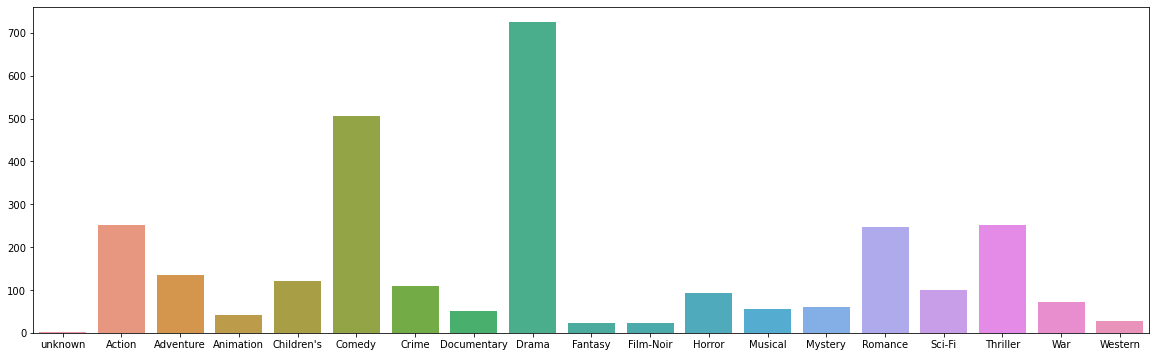

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
sns.barplot(x = item.loc[:,'unknown':'Western'].sum().index, y = item.loc[:,'unknown':'Western'].sum().values)

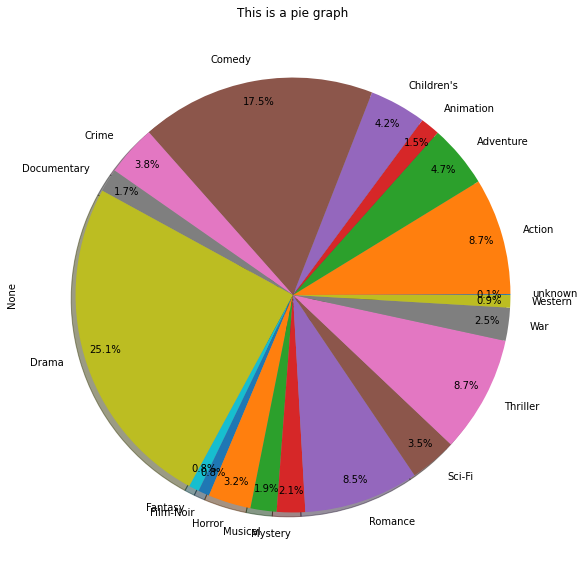

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
item.loc[:, 'unknown':'Western'].sum().plot.pie(autopct='%.1f%%', radius=1.0,pctdistance=0.9, shadow=True, labeldistance=1.1, title='This is a pie graph', textprops=dict(color="black"))

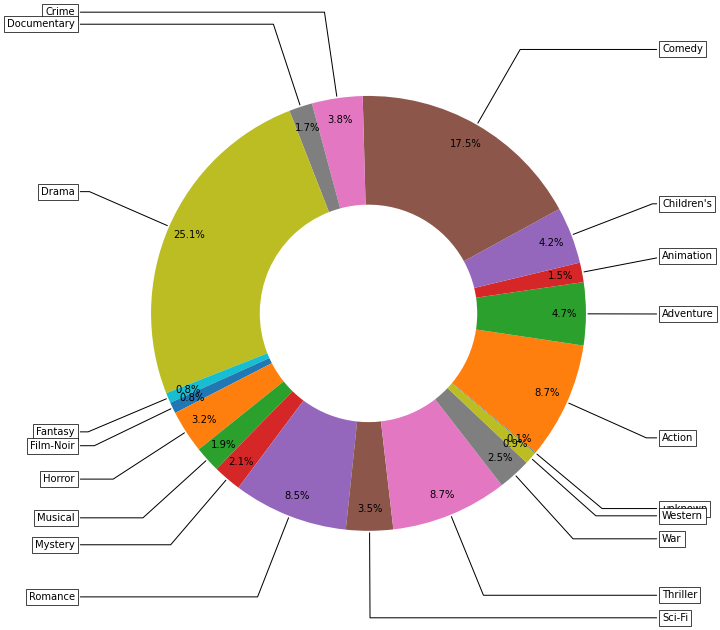

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

recipe = ['unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

dataframe = item.loc[:, 'unknown':'Western'].sum()

wedges, texts,_ = ax.pie(dataframe, wedgeprops=dict(width=0.5), startangle=-40, autopct='%.1f%%', pctdistance=0.9)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.style.use('seaborn-notebook')
#ax.set_title("Matplotlib bakery: A donut")
plt.show()

In [17]:
item['movie id'].unique().shape

(1682,)

In [18]:
item.isna().sum()

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
year                     1
dtype: int64

In [19]:
#Load the User data
user = pd.read_csv('./ml-100k/u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
user.shape

(943, 5)

In [21]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [22]:
user.duplicated().value_counts()

False    943
dtype: int64

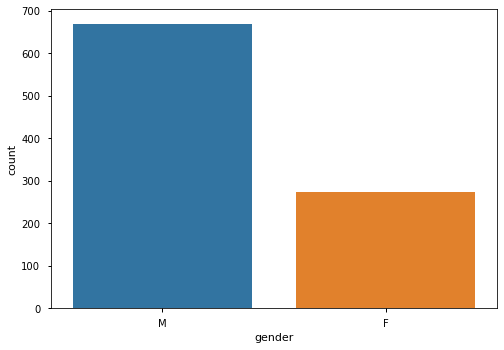

In [23]:
sns.countplot(data=user, x='gender')

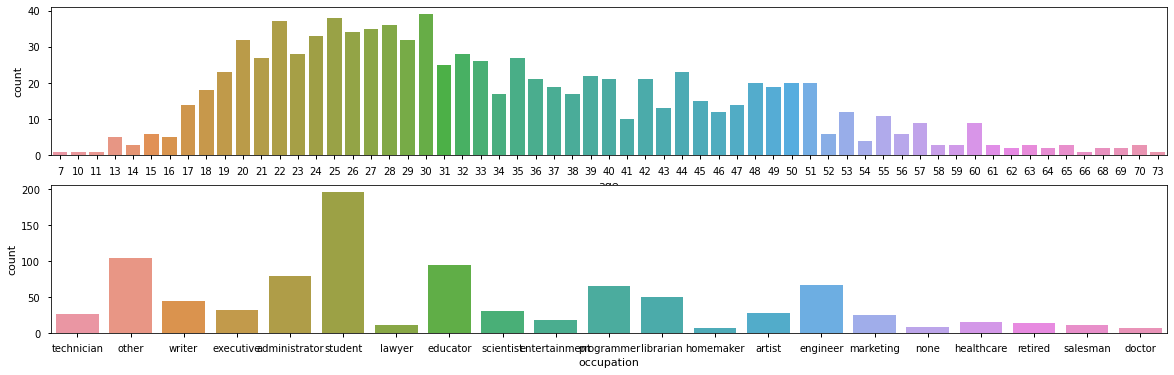

In [24]:
fig, ax = plt.subplots(2,1, figsize=(20,6))
sns.countplot(data=user, x='age', ax=ax[0])
sns.countplot(data=user, x='occupation', ax = ax[1])

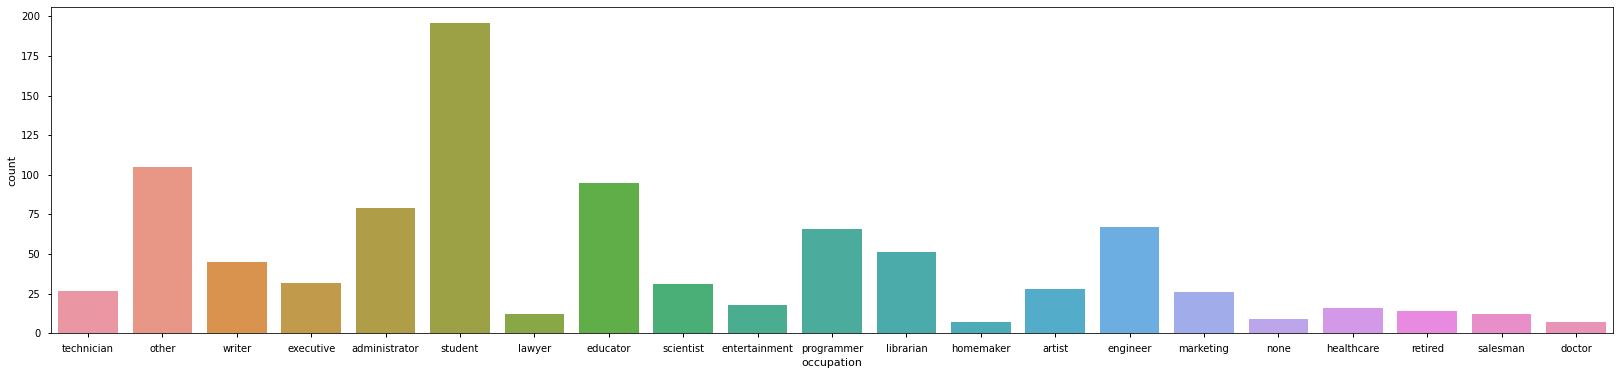

In [25]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.countplot(data=user, x='occupation')

In [26]:
df_merged = pd.merge(data, item, on='movie id', how='left')
df_merged

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)",1996-09-14,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0
99996,716,204,5,879795543,Back to the Future (1985),1985-01-01,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,1,0,0,0,1985.0
99997,276,1090,1,874795795,Sliver (1993),1993-01-01,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,1,0,0,1993.0
99998,13,225,2,882399156,101 Dalmatians (1996),1996-11-27,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0


In [27]:
df_merged.groupby('movie id').count().sort_values(by='user id', ascending=False)

,user id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie id,,,,,,,,,,,,,,,,,,,,,
50,583,583,583,583,583,0,583,583,583,583,...,583,583,583,583,583,583,583,583,583,583
258,509,509,509,509,509,0,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
100,508,508,508,508,508,0,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508
181,507,507,507,507,507,0,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507
294,485,485,485,485,485,0,485,485,485,485,...,485,485,485,485,485,485,485,485,485,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1577,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,1997.0


In [29]:
df_merged.drop(df_merged.columns[[3,4,5,6,7]], axis=1)

,user id,movie id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1996.0
99996,716,204,5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1985.0
99997,276,1090,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1993.0
99998,13,225,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1996.0


In [30]:
RatingMatrix=pd.pivot_table(df_merged, values='rating',
                                    index=['user id'], columns=['movie id'])
RatingMatrix.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(RatingMatrix.shape)
print(len(RatingMatrix))

(943, 1682)
943


In [32]:
df_merged.groupby('movie id')['user id'].count()

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user id, Length: 1682, dtype: int64

In [33]:
df_merged_2 = pd.merge(df_merged, user, on='user id', how='left')
df_merged_2.head()

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Romance,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,1997.0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,0,1,0,0,1997.0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,1994.0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,1,0,0,1,1,1994.0,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,1997.0,47,M,educator,55113


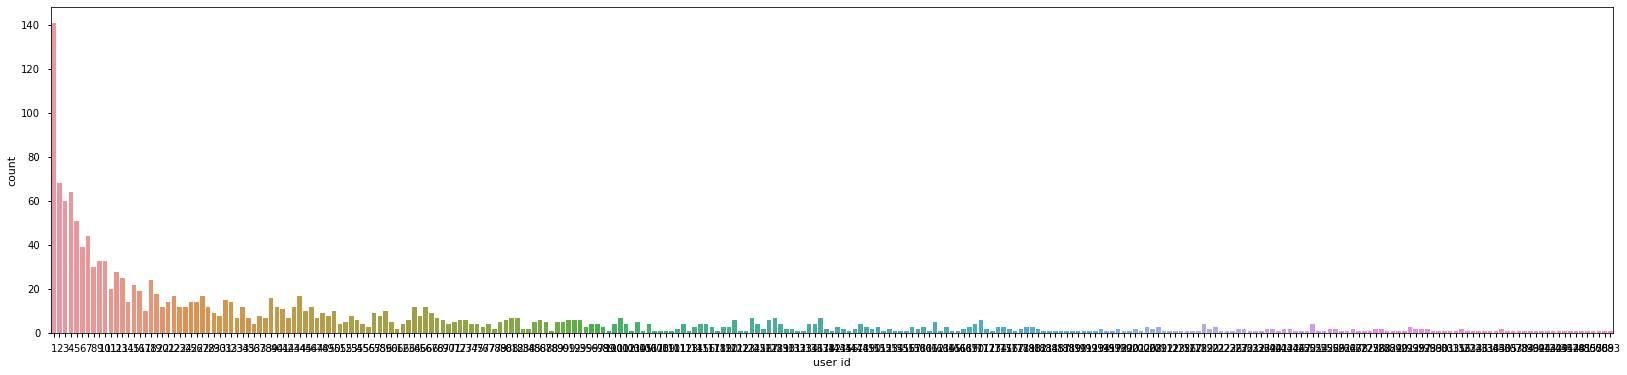

In [34]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.countplot(df_merged.groupby('movie id')['user id'].count())

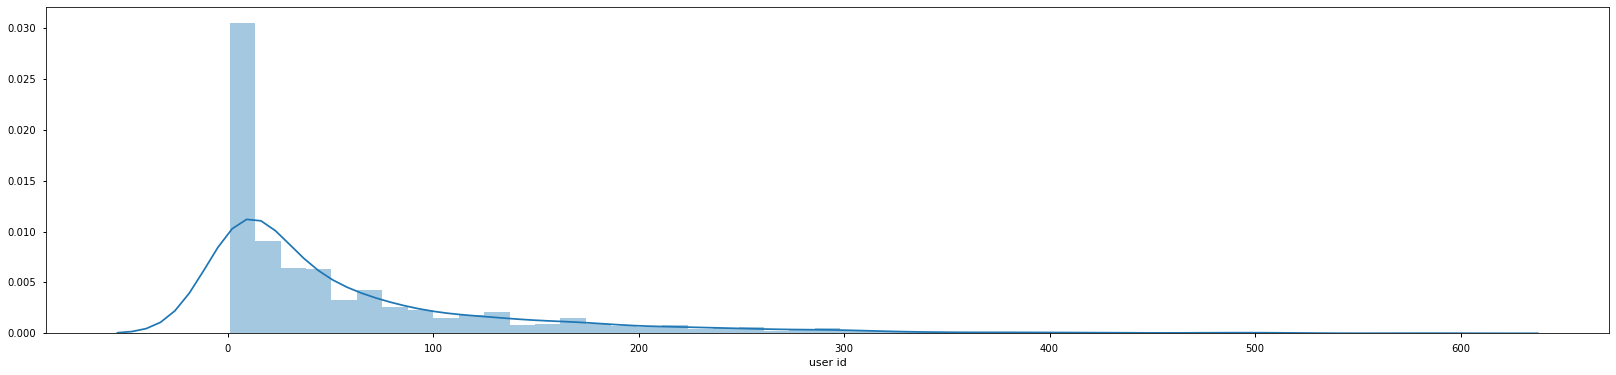

In [35]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.distplot(df_merged.groupby('movie id')['user id'].count())

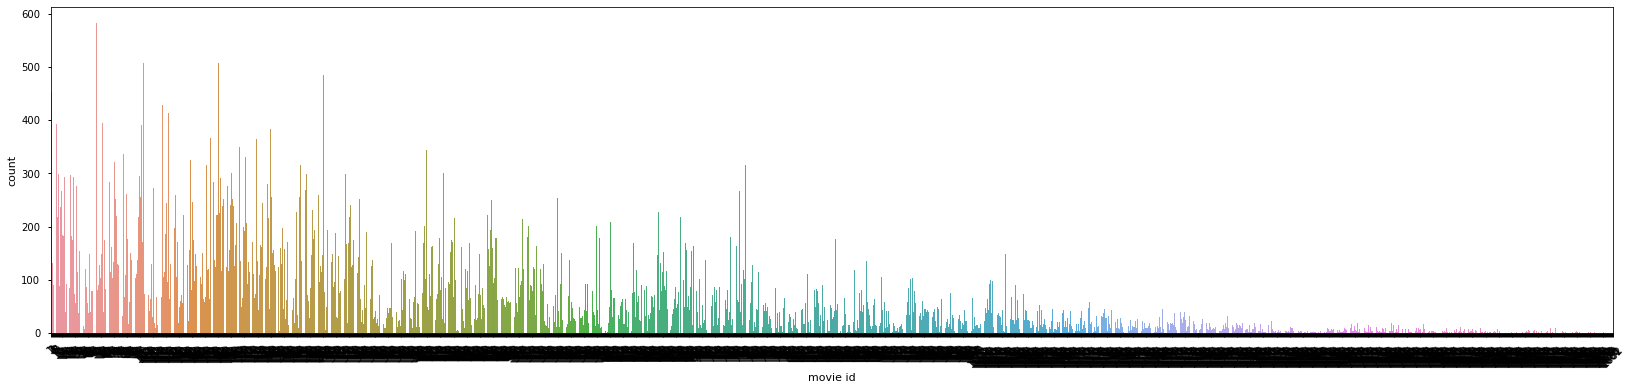

In [36]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
plt.xticks(rotation=45)
sns.countplot(data=df_merged, x='movie id')

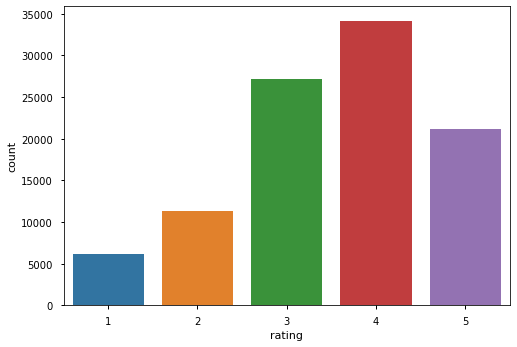

In [37]:
sns.countplot(data=df_merged, x='rating')

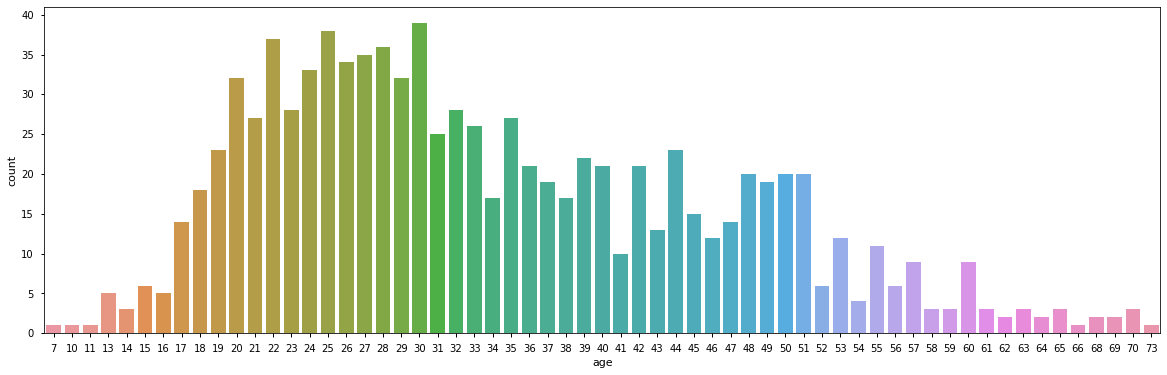

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
sns.countplot(data=user, x='age')

# Content based recommendation

In [39]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation
from scipy.spatial.distance import hamming
from sklearn.preprocessing import normalize
from keras.preprocessing import image
import matplotlib.gridspec as gridspec

Using TensorFlow backend.
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\t

In [40]:
df_genre = df_merged[['movie id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
df_genre = df_genre.groupby('movie id').sum()
df_genre_norm = pd.DataFrame(normalize(df_genre, axis=0))
df_genre_norm.columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_genre_norm.index = df_genre.index
df_genre_norm

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.585647,0.434579,0.214216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.055258,0.075551,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.064058,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.044010,0.0,0.0
4,0.0,0.088159,0.000000,0.000000,0.000000,0.099051,0.000000,0.0,0.080994,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.069007,0.0,0.033328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.042054,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000388,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1679,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.000489,0.0,0.0
1680,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000388,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.000000,0.0,0.0


In [41]:
df_title = item[['movie id', 'movie title']]
df_title = df_title.set_index('movie id')
df_title

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [42]:
def movie_recommender(distance_method, movie_id, user_id, N):
    # create dataframe used to store distances between recipes
    allMovies = pd.DataFrame(df_genre_norm.index)
    
    allMovies = allMovies[allMovies['movie id'] != movie_id]
    
    allMovies["distance"] = allMovies['movie id'].apply(lambda x: distance_method(df_genre_norm.loc[movie_id], df_genre_norm.loc[x]))
    #print(allMovies['distance'])
    
    TopNRecommendation = allMovies.sort_values(["distance"])#.head(N)
    print(f"Before remove viewed movied:\n {TopNRecommendation}")
   
    viewed_movies = df_merged[df_merged['user id'] == user_id]['movie id'].values
    print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    
    TopNRecommendation = TopNRecommendation[~TopNRecommendation['movie id'].isin(viewed_movies)]  # Using ~ means .notin (Don't have this command, so use conditional operation)
    print(f"After remove viewed movied:\n {TopNRecommendation}")
    
    TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    
    for recipeid in TopNRecommendation['movie id']:
        print(recipeid)
   
    #return TopNRecommendation
    return df_genre_norm.loc[TopNRecommendation['movie id']]

In [43]:
print("Recommended Movies: ")
result = movie_recommender(euclidean, 1680, 186, 3)
result

Recommended Movies: 
Before remove viewed movied:
       movie id  distance
1492      1493  0.000388
1562      1563  0.000388
1339      1340  0.000388
1579      1580  0.000388
1525      1526  0.000489
...        ...       ...
301        302  0.707667
49          50  0.714160
0            1  0.760086
422        423  0.766825
266        267  0.993884

[1681 rows x 2 columns]
viewed movies are:
 [ 302  566  250  148  263  470  983  281  385  588  406  925  977  322
   53  333  591  742  770  550  237 1277 1253   71  554  257   44  117
  327  288  225  988   31  939  546  100  338  717  118  226  300  299
  596   95  243 1016   79  306  106  829  934 1399  754  595  121  568
  303  332  540 1046   98   56  880  203 1336 1083  291  356  684   38
  477  258  298  820 1033  887  330  689  159   12   55  294 1213 1042
  177 1385  331   77  405  147  295  269]
(92,)
After remove viewed movied:
       movie id  distance
1492      1493  0.000388
1562      1563  0.000388
1339      1340  0.000388
1

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0
1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0


# Collaborative Recommendation

In [44]:
RatingMatrix=pd.pivot_table(df_merged, values='rating',
                                    index=['user id'], columns=['movie id'])
RatingMatrix.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print(RatingMatrix.shape)
print(len(RatingMatrix))

(943, 1682)
943


In [46]:
RatingMatrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user id', length=943)

In [47]:
# To Find the k nearest neighbours of active user first find the distance of active user to all other users
def nearestneighbours(df, distance_method, user,K):
    # create a user df that contains all users except active user
    allUsers = pd.DataFrame(df.index)
    allUsers = allUsers[allUsers['user id'] != user]
    #print(allUsers)
    
    # Add a column to this df which contains distance of active user to each user
    allUsers["distance"] = allUsers["user id"].apply(lambda x: distance_method(df.loc[user],df.loc[x]))
    KnearestUsers = allUsers.sort_values(["distance"],ascending=True)[["user id", "distance"]][:K]
    return KnearestUsers

In [48]:
print(nearestneighbours(RatingMatrix, hamming, 186, 5))
x = nearestneighbours(RatingMatrix, hamming, 186, 5)

     user id  distance
129      130  0.985731
795      796  0.989298
312      313  0.989298
550      551  0.989893
346      347  0.989893


In [49]:
# To be finished, movies to be recommended under collaborative recommendation

def topN(df, distance_method, user, N=5):
    KnearestUsers = nearestneighbours(df, distance_method, user, N)
    #print(KnearestUsers)
    print(df[df.index.isin(KnearestUsers)].shape)
    
    NNRatings = df.iloc[df.index.isin(KnearestUsers)]
    #print(f" NNRating: {NNRatings}")
    
    avgRating = NNRatings
    
    viewed_movies = df.loc[user].dropna().index
    print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    
    avgRating = avgRating[~avgRating['movie id'].isin(viewed_movies)]
    print(avgRating)
    topNISBNs = avgRating.sort_values(ascending=False).index[:N]
    
    return topNISBNs

In [50]:
NNRatings = df_merged[df_merged['user id'].isin(x['user id'].values)]['movie id']
type(NNRatings)

pandas.core.series.Series

In [51]:
viewed_movies = df_merged[df_merged['user id'] == 186]['movie id'].values
viewed_movies

array([ 302,  566,  250,  148,  263,  470,  983,  281,  385,  588,  406,
        925,  977,  322,   53,  333,  591,  742,  770,  550,  237, 1277,
       1253,   71,  554,  257,   44,  117,  327,  288,  225,  988,   31,
        939,  546,  100,  338,  717,  118,  226,  300,  299,  596,   95,
        243, 1016,   79,  306,  106,  829,  934, 1399,  754,  595,  121,
        568,  303,  332,  540, 1046,   98,   56,  880,  203, 1336, 1083,
        291,  356,  684,   38,  477,  258,  298,  820, 1033,  887,  330,
        689,  159,   12,   55,  294, 1213, 1042,  177, 1385,  331,   77,
        405,  147,  295,  269], dtype=int64)

In [52]:
pd.Series(viewed_movies)

0     302
1     566
2     250
3     148
4     263
     ... 
87     77
88    405
89    147
90    295
91    269
Length: 92, dtype: int64

In [53]:
avgRating = NNRatings
avgRating = avgRating[~avgRating.isin(pd.Series(viewed_movies))]
avgRating

194       379
199       216
290      1014
385      1017
527       109
         ... 
99299    1291
99408     926
99526     427
99932     824
99950      93
Name: movie id, Length: 1264, dtype: int64

In [54]:
topN(RatingMatrix, hamming, 186, 5)

(0, 1682)
viewed movies are:
 Int64Index([  12,   31,   38,   44,   53,   55,   56,   71,   77,   79,   95,
              98,  100,  106,  117,  118,  121,  147,  148,  159,  177,  203,
             225,  226,  237,  243,  250,  257,  258,  263,  269,  281,  288,
             291,  294,  295,  298,  299,  300,  302,  303,  306,  322,  327,
             330,  331,  332,  333,  338,  356,  385,  405,  406,  470,  477,
             540,  546,  550,  554,  566,  568,  588,  591,  595,  596,  684,
             689,  717,  742,  754,  770,  820,  829,  880,  887,  925,  934,
             939,  977,  983,  988, 1016, 1033, 1042, 1046, 1083, 1213, 1253,
            1277, 1336, 1385, 1399],
           dtype='int64', name='movie id')
(92,)


KeyError: 'movie id'

In [ ]:
viewed_movies = df_merged[df_merged['user id'] == 186]['movie id'].values
print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")

In [ ]:
RatingMatrix_norm = RatingMatrix.fillna(1)
RatingMatrix_norm = pd.DataFrame(normalize(RatingMatrix_norm, axis=0))
RatingMatrix_norm.columns = RatingMatrix.columns
RatingMatrix_norm.index = RatingMatrix.index
RatingMatrix_norm

In [ ]:
print(nearestneighbours(RatingMatrix_norm, euclidean, 186, 5))

In [ ]:
pd.set_option("display.max_columns", 10000)
RatingMatrix_norm[RatingMatrix_norm.index.isin([186,130,796,155,431])].sum(axis=1)

In [ ]:
print(nearestneighbours(RatingMatrix_norm, correlation, 186, 5))

In [ ]:
pd.set_option("display.max_columns", 10000)
RatingMatrix_norm[RatingMatrix_norm.index.isin([186,332,431,633])].sum(axis=1)

# Matrix Factorization

In [55]:
df_merged_2 = df_merged_2.drop(df_merged.columns[[3,4,5,6,7]], axis=1)
df_merged_2 = df_merged_2.drop('zip code', axis=1)
df_merged_2 = df_merged_2.drop('year', axis=1)
df_merged_2

,user id,movie id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,196,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,49,M,writer
1,186,302,3,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,39,F,executive
2,22,377,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,25,M,writer
3,244,51,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,28,M,technician
4,166,346,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,47,M,educator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,13,M,student
99996,716,204,5,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,36,F,administrator
99997,276,1090,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,21,M,student
99998,13,225,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,47,M,educator


In [56]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.reader import Reader


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9375  0.9424  0.9361  0.9359  0.9350  0.9374  0.0026  
MAE (testset)     0.7416  0.7434  0.7364  0.7377  0.7373  0.7393  0.0027  
Fit time          3.82    3.60    3.46    3.74    4.14    3.75    0.23    
Test time         0.10    0.10    0.09    0.11    0.11    0.10    0.01    


{'test_rmse': array([0.93753159, 0.94241387, 0.93614212, 0.93594102, 0.93501657]),
 'test_mae': array([0.74156318, 0.74336702, 0.73636083, 0.73767612, 0.7372834 ]),
 'fit_time': (3.8237481117248535,
  3.6033716201782227,
  3.4607489109039307,
  3.7419979572296143,
  4.142961025238037),
 'test_time': (0.10201525688171387,
  0.10074305534362793,
  0.09175515174865723,
  0.10874104499816895,
  0.11170077323913574)}

In [57]:
type(data)

surprise.dataset.DatasetAutoFolds

In [58]:
df_dataset = df_merged[['movie id', 'user id', 'rating']]
df_dataset.head()

,movie id,user id,rating
0,242,196,3
1,302,186,3
2,377,22,1
3,51,244,2
4,346,166,1


In [59]:
# We'll use the famous SVD algorithm.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataset, reader)
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9430  0.9359  0.9368  0.9394  0.9381  0.0028  
MAE (testset)     0.7392  0.7426  0.7374  0.7359  0.7416  0.7393  0.0025  
Fit time          4.05    4.74    4.14    4.03    4.18    4.23    0.26    
Test time         0.11    0.11    0.11    0.11    0.12    0.11    0.00    


{'test_rmse': array([0.93561665, 0.94295808, 0.93587933, 0.93681002, 0.93938253]),
 'test_mae': array([0.7391857 , 0.74257702, 0.73735086, 0.73592587, 0.74156813]),
 'fit_time': (4.053171157836914,
  4.739332675933838,
  4.143688201904297,
  4.0332136154174805,
  4.184816360473633),
 'test_time': (0.11170172691345215,
  0.10671401023864746,
  0.1107017993927002,
  0.10771465301513672,
  0.1166830062866211)}

In [60]:
result = []
for i in range(1,1683):
    pred = algo.predict(186, i)
    result.append(pred)

In [61]:
result[0:10]

[Prediction(uid=186, iid=1, r_ui=None, est=4.040176182830678, details={'was_impossible': False}),
 Prediction(uid=186, iid=2, r_ui=None, est=3.8573740037182307, details={'was_impossible': False}),
 Prediction(uid=186, iid=3, r_ui=None, est=3.1832582115183543, details={'was_impossible': False}),
 Prediction(uid=186, iid=4, r_ui=None, est=4.3484314415204945, details={'was_impossible': False}),
 Prediction(uid=186, iid=5, r_ui=None, est=4.1596265484563215, details={'was_impossible': False}),
 Prediction(uid=186, iid=6, r_ui=None, est=3.7539635913925635, details={'was_impossible': False}),
 Prediction(uid=186, iid=7, r_ui=None, est=4.391073991263187, details={'was_impossible': False}),
 Prediction(uid=186, iid=8, r_ui=None, est=4.1842333314146725, details={'was_impossible': False}),
 Prediction(uid=186, iid=9, r_ui=None, est=4.55697639790093, details={'was_impossible': False}),
 Prediction(uid=186, iid=10, r_ui=None, est=4.197097477896431, details={'was_impossible': False})]

In [62]:
for a,b,c,d,e in result:
    print(b,d)

1 4.040176182830678
2 3.8573740037182307
3 3.1832582115183543
4 4.3484314415204945
5 4.1596265484563215
6 3.7539635913925635
7 4.391073991263187
8 4.1842333314146725
9 4.55697639790093
10 4.197097477896431
11 3.4478076835285574
12 4.504909106956263
13 3.7552497299270264
14 4.325710598335976
15 3.7712463741196887
16 4.543493511477468
17 3.306560179487588
18 4.081571974345174
19 3.9352943107834015
20 3.1231167615877804
21 3.219819828737267
22 4.619218936493589
23 3.761475344520874
24 4.458979496764725
25 4.272472200158482
26 3.451710174213263
27 3.5669756139185465
28 4.293860065683129
29 3.810010951812048
30 4.261506916495467
31 3.9100671159220206
32 4.085677575735055
33 4.221757451208225
34 4.1493881628922855
35 3.972455915213187
36 4.356463807351677
37 3.848624850568748
38 4.784368973415804
39 4.1292366079414204
40 3.787438268580503
41 3.7413886044415334
42 4.260019996631718
43 4.014743965633669
44 3.7873208103726865
45 4.3602252345152275
46 4.283530116692794
47 3.697643663495567
48 4.

694 4.40090276548571
695 4.0322687346898025
696 4.397145046738057
697 3.5714802371885632
698 3.0667929583231843
699 3.731340242307287
700 3.707192745724288
701 4.129400583765997
702 3.7573794602638944
703 4.25213348853864
704 3.8637742563033513
705 4.1412926198596764
706 3.961405244374548
707 3.577408547844577
708 4.111043063929842
709 4.205226306591771
710 3.607032599561854
711 3.49407891391189
712 4.190270231292522
713 3.81687499871368
714 4.143774531230576
715 3.7217181795721395
716 3.4827449729034097
717 4.03097423954524
718 4.127656419145916
719 3.3283582484291356
720 4.087327218539135
721 4.196128692480565
722 4.481207866948824
723 3.37650025355528
724 3.025644407522189
725 4.303576553704916
726 3.70485878313673
727 3.9960718153014914
728 3.8657599514470267
729 3.727657197470763
730 3.6716028257767483
731 3.7096579892585617
732 4.059720069594716
733 3.327443848061633
734 3.5247352867426938
735 3.6830588589875495
736 3.5934328127710224
737 3.9471243261540225
738 4.14434755005017
7

1095 4.031810212563964
1096 4.031810212563964
1097 4.031810212563964
1098 4.031810212563964
1099 4.031810212563964
1100 4.031810212563964
1101 4.031810212563964
1102 4.031810212563964
1103 4.031810212563964
1104 4.031810212563964
1105 4.031810212563964
1106 4.031810212563964
1107 4.031810212563964
1108 4.031810212563964
1109 4.031810212563964
1110 4.031810212563964
1111 4.031810212563964
1112 4.031810212563964
1113 4.031810212563964
1114 4.031810212563964
1115 4.031810212563964
1116 4.031810212563964
1117 4.031810212563964
1118 4.031810212563964
1119 4.031810212563964
1120 4.031810212563964
1121 4.031810212563964
1122 4.031810212563964
1123 4.031810212563964
1124 4.031810212563964
1125 4.031810212563964
1126 4.031810212563964
1127 4.031810212563964
1128 4.031810212563964
1129 4.031810212563964
1130 4.031810212563964
1131 4.031810212563964
1132 4.031810212563964
1133 4.031810212563964
1134 4.031810212563964
1135 4.031810212563964
1136 4.031810212563964
1137 4.031810212563964
1138 4.0318

1599 4.031810212563964
1600 4.031810212563964
1601 4.031810212563964
1602 4.031810212563964
1603 4.031810212563964
1604 4.031810212563964
1605 4.031810212563964
1606 4.031810212563964
1607 4.031810212563964
1608 4.031810212563964
1609 4.031810212563964
1610 4.031810212563964
1611 4.031810212563964
1612 4.031810212563964
1613 4.031810212563964
1614 4.031810212563964
1615 4.031810212563964
1616 4.031810212563964
1617 4.031810212563964
1618 4.031810212563964
1619 4.031810212563964
1620 4.031810212563964
1621 4.031810212563964
1622 4.031810212563964
1623 4.031810212563964
1624 4.031810212563964
1625 4.031810212563964
1626 4.031810212563964
1627 4.031810212563964
1628 4.031810212563964
1629 4.031810212563964
1630 4.031810212563964
1631 4.031810212563964
1632 4.031810212563964
1633 4.031810212563964
1634 4.031810212563964
1635 4.031810212563964
1636 4.031810212563964
1637 4.031810212563964
1638 4.031810212563964
1639 4.031810212563964
1640 4.031810212563964
1641 4.031810212563964
1642 4.0318

In [63]:
# ===========================================

In [64]:
from collections import defaultdict
from surprise import SVD
from surprise import Dataset

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    #print(f"1.\n {top_n}")

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    #print(f"2.\n {top_n}")

    return top_n

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataset, reader)
#data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

In [65]:
top_n

defaultdict(list,
            {242: [(137, 5),
              (118, 5),
              (477, 5),
              (507, 5),
              (519, 5),
              (688, 5),
              (810, 5),
              (849, 5),
              (907, 5),
              (939, 5)],
             302: [(225, 5),
              (256, 5),
              (239, 5),
              (137, 5),
              (118, 5),
              (274, 5),
              (4, 5),
              (34, 5),
              (261, 5),
              (372, 5)],
             377: [(688, 4.100878391987916),
              (507, 3.9931995566397327),
              (427, 3.983343996710725),
              (810, 3.894665626111478),
              (372, 3.823923788449555),
              (939, 3.823072218731062),
              (849, 3.804125238279573),
              (928, 3.79499088758564),
              (477, 3.7885204463598563),
              (907, 3.788043701438326)],
             51: [(427, 4.906915483572818),
              (688, 4.850542202939159),
  

In [66]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    #if uid == '196':
        print(uid, [iid for (iid, _) in user_ratings])

242 [137, 118, 477, 507, 519, 688, 810, 849, 907, 939]
302 [225, 256, 239, 137, 118, 274, 4, 34, 261, 372]
377 [688, 507, 427, 810, 372, 939, 849, 928, 477, 907]
51 [427, 688, 507, 907, 477, 810, 366, 286, 270, 357]
346 [688, 507, 118, 628, 472, 137, 427, 261, 849, 928]
474 [157, 242, 52, 270, 4, 261, 367, 427, 440, 477]
265 [427, 507, 642, 810, 907, 939, 688, 849, 477, 628]
465 [688, 907, 427, 507, 270, 849, 477, 810, 628, 939]
451 [688, 388, 628, 939, 907, 507, 173, 300, 620, 810]
86 [519, 688, 939, 477, 507, 928, 427, 849, 810, 367]
257 [688, 810, 427, 628, 849, 850, 495, 907, 200, 118]
1014 [688, 427, 849, 477, 907, 507, 127, 810, 923, 332]
222 [688, 427, 907, 810, 628, 534, 849, 330, 261, 477]
40 [928, 472, 849, 507, 688, 628, 810, 534, 357, 770]
29 [507, 688, 427, 848, 849, 907, 118, 351, 628, 810]
785 [688, 507, 628, 427, 928, 472, 810, 477, 513, 907]
387 [688, 907, 849, 477, 427, 628, 366, 519, 507, 565]
274 [642, 688, 628, 810, 38, 507, 372, 862, 850, 351]
1042 [849, 628, 688,

548 [688, 427, 152, 519, 810, 628, 928, 507, 939, 849]
1132 [688, 939, 519, 628, 427, 507, 907, 810, 862, 849]
993 [688, 507, 427, 849, 810, 332, 628, 324, 295, 4]
136 [270, 118, 372, 427, 477, 507, 519, 628, 688, 810]
996 [688, 507, 628, 907, 849, 427, 810, 939, 472, 367]
562 [688, 507, 427, 324, 628, 366, 810, 477, 939, 270]
653 [507, 628, 688, 810, 849, 939, 427, 367, 357, 565]
74 [688, 477, 519, 427, 507, 907, 849, 887, 270, 810]
1493 [688, 507, 849, 324, 427, 357, 628, 351, 472, 519]
45 [118, 324, 367, 427, 477, 507, 519, 628, 688, 849]
867 [507, 688, 427, 849, 628, 907, 477, 810, 939, 770]
876 [688, 507, 427, 270, 366, 472, 907, 173, 295, 286]
158 [688, 507, 849, 477, 427, 137, 372, 324, 939, 628]
1183 [688, 507, 939, 477, 427, 810, 849, 270, 907, 372]
1118 [688, 507, 810, 137, 519, 849, 4, 118, 770, 472]
500 [507, 688, 810, 907, 939, 152, 427, 628, 372, 849]
610 [688, 810, 928, 366, 507, 628, 939, 477, 849, 907]
887 [427, 688, 477, 810, 770, 628, 939, 923, 849, 242]
1299 [688, 5

# Read imdb csv

In [67]:
df_imdb = pd.read_csv('imdb_new.csv')

In [68]:
df_imdb = df_imdb.rename(columns={"Unnamed: 0":"movie_id"})

In [69]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [70]:
df_imdb['genre'].isna().value_counts()

False    5208
Name: genre, dtype: int64

In [71]:
df_imdb['genre'] = df_imdb['genre'].apply(lambda x: x.replace(" ",""))

In [72]:
df_imdb['genre'] = df_imdb['genre'].apply(lambda x: x.split(sep=','))
df_imdb.head()

,movie_id,title,year,genre,rating,director,actors,votes,url
0,0,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2222222.0,https://www.imdb.com/title/tt0468569/?ref_=adv...
1,1,The Mountain II,2016,"[Action, Drama, War]",8.9,Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu T?rkpen?e...",103623.0,https://www.imdb.com/title/tt5813916/?ref_=adv...
2,2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",1978620.0,https://www.imdb.com/title/tt1375666/?ref_=adv...
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama]",8.8,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1606922.0,https://www.imdb.com/title/tt0120737/?ref_=adv...
4,4,The Matrix,1999,"[Action, Sci-Fi]",8.7,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1617768.0,https://www.imdb.com/title/tt0133093/?ref_=adv...


In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.preprocessing import Binarizer
mlb = MultiLabelBinarizer()

In [148]:
df_imdb_directors = df_imdb['director'].apply(lambda x: x.replace(", ",","))
df_imdb_directors = df_imdb['director'].apply(lambda x: x.split(sep=','))

In [151]:
df_imdb_directors = pd.DataFrame(mlb.fit_transform(df_imdb_directors), columns=mlb.classes_)

In [168]:
df_imdb_directors = df_imdb_directors.drop([i for i in df_imdb_directors.columns if "?" in i], axis=1)
df_imdb_directors

,Aaron Moorhead,Adrian Molina,Akshat Verma,Alan Mak,Alexander Payne,Allen Hughes,Amole Gupte,Andrew Marton,Andrew Stanton,Andy Nyman,Angus MacLane,Anouk Whissell,Anthony Stacchi,Art Stevens,Arthur Davis,Arthur Rosson,Ash Brannon,Barrie Nelson,Barry Cook,Ben Sharpsteen,Bernhard Wicki,Bill Roberts,Bob Peterson,Boyd Kirkland,Bradford Lewis,Brenda Chapman,Brian Mulroney,Bruce Timm,Burny Mattinson,Buster Keaton,Byron Howard,Carlos Saldanha,Casper Kelly,Cem Yilmaz,Charlie Kaufman,Chi-Hwa Chen,Chris Buck,Chris Renaud,Chris Sanders,Chris Williams,Christopher Doyle,Christopher Miller,Chuck Jones,Clyde Geronimi,Conrad Vernon,Curtis Hanson,Dan Kuenster,Dan Riba,Daniel Scheinert,Daniela Thomas,...,Umesh Shukla,Uwe Boll,Vadim Perelman,Victor Fleming,Victor Salva,Vikas Bahl,Vikramaditya Motwane,Vince Gilligan,Vincent Gallo,Vincent Paronnaud,Vincent Ward,Vincente Minnelli,Vincenzo Natali,Vishal Bhardwaj,Vittorio De Sica,W.S. Van Dyke,Walter Hill,Walter Salles,Warren Beatty,Wayne Kramer,Wei Lo,Werner Herzog,Wes Anderson,Wes Ball,Wes Craven,Will Gluck,William Cottrell,William Friedkin,William Wyler,Wilson Yip,Wim Wenders,Wolfgang Becker,Wolfgang Petersen,Wolfgang Reitherman,Woo-Ping Yuen,Woody Allen,Xavier Dolan,Yann Demange,Yann Samuell,Yarrow Cheney,Yash Chopra,Yavuz Turgul,Yilmaz Erdogan,Yimou Zhang,Yorgos Lanthimos,Yoshiaki Kawajiri,Zack Snyder,Zak Hilditch,Zaza Urushadze,Zoya Akhtar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
df_imdb_actors = df_imdb['actors'].apply(lambda x: x.replace(", ",","))
df_imdb_actors = df_imdb['actors'].apply(lambda x: x.split(sep=','))

In [188]:
df_imdb_actors

,50 Cent,A.J. Langer,AJ Bowen,AJ Michalka,Aamir Bashir,Aamir Khan,Aaran Thomas,Aaron Eckhart,Aaron Paul,Aaron Taylor-Johnson,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abby Craden,Abdel Ahmed Ghili,Abhay Deol,Abhishek Bachchan,Abigail Breslin,Abigail Spencer,Abraham Benrubi,Achita Sikamana,Adam Baldwin,Adam Beach,Adam Brody,Adam Bryant,Adam Devine,Adam Driver,Adam Garcia,Adam Goldberg,Adam Levine,Adam Pascal,Adam Sandler,Adam Sevani,Adeel Akhtar,Adel Bencherif,Adil Hussain,Aditi Rao Hydari,Aditya Roy Kapoor,Adolphe Menjou,Adriana Mocca,Adriana Ugarte,Adrien Brody,Adrienne Barbeau,Adrienne King,Agata Kulesza,Agnes Kittelsen,Agnes Moorehead,Ahna Capri,Ahney Her,Aicha Abadir,...,Wagner Moura,Wallace Ford,Walter Matthau,Walter Pidgeon,Warren Beatty,Werner Krauss,Wesley Snipes,Whoopi Goldberg,Wil Wheaton,Will Adamsdale,Will Arnett,Will Ferrell,Will Smith,Willem Dafoe,William H. Macy,William Holden,William Hurt,William Petersen,William Powell,William Shatner,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Xavier Samuel,Yash,Yasuo Yamada,Yeong-ae Lee,Yilmaz Erdogan,Yoko Honna,Yoo Gong,Yoon-seok Kim,Yu-Hang To,Yul Brynner,Yun-Fat Chow,Yves Montand,Zac Efron,Zach Braff,Zach Galifianakis,Zach Galligan,Zachary Gordon,Zachary Levi,Zack Gottsagen,Zain Al Rafeea,Zana Marjanovic,Zbigniew Zamachowski,Zero Mostel,Ziyi Zhang,Zoe Margaret Colletti,Zooey Deschanel
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
df_imdb_actors = pd.DataFrame(mlb.fit_transform(df_imdb_actors), columns=mlb.classes_)

In [170]:
df_imdb_actors

,50 Cent,?etin Tekindor,?lvaro Guerrero,?lvaro Morte,?mile Vall?e,?milie Leclerc,?scar Jaenada,?scar Zafra,?zg?r Eren Ko?,?zge ?zberk,?zkan Ugur,?zlem Tekin,A.J. Langer,AJ Bowen,AJ Michalka,Aamir Bashir,Aamir Khan,Aaran Thomas,Aaron Eckhart,Aaron Paul,Aaron Taylor-Johnson,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abby Craden,Abdel Ahmed Ghili,Abhay Deol,Abhishek Bachchan,Abigail Breslin,Abigail Spencer,Abraham Benrubi,Achita Sikamana,Ad?le Exarchopoulos,Ad?le Haenel,Adam Baldwin,Adam Beach,Adam Brody,Adam Bryant,Adam Devine,Adam Driver,Adam Garcia,Adam Goldberg,Adam Levine,Adam Pascal,Adam Sandler,Adam Sevani,Adeel Akhtar,Adel Bencherif,Adil Hussain,Aditi Rao Hydari,...,Wallace Ford,Walter Matthau,Walter Pidgeon,Warren Beatty,Werner Krauss,Wesley Snipes,Whoopi Goldberg,Wil Wheaton,Will Adamsdale,Will Arnett,Will Ferrell,Will Smith,Willem Dafoe,William H. Macy,William Holden,William Hurt,William Petersen,William Powell,William Shatner,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Xavier Samuel,Y?ji Matsuda,Yash,Yasuo Yamada,Yeong-ae Lee,Yilmaz Erdogan,Yoko Honna,Yoo Gong,Yoon-seok Kim,Yu-Hang To,Yul Brynner,Yun-Fat Chow,Yves Montand,Zac Efron,Zach Braff,Zach Galifianakis,Zach Galligan,Zachary Gordon,Zachary Levi,Zack Gottsagen,Zain Al Rafeea,Zana Marjanovic,Zbigniew Zamachowski,Zero Mostel,Ziyi Zhang,Zoe Margaret Colletti,Zooey Deschanel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
df_imdb_actors = df_imdb_actors.drop([i for i in df_imdb_actors.columns if "?" in i], axis=1)
df_imdb_actors

,50 Cent,A.J. Langer,AJ Bowen,AJ Michalka,Aamir Bashir,Aamir Khan,Aaran Thomas,Aaron Eckhart,Aaron Paul,Aaron Taylor-Johnson,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abby Craden,Abdel Ahmed Ghili,Abhay Deol,Abhishek Bachchan,Abigail Breslin,Abigail Spencer,Abraham Benrubi,Achita Sikamana,Adam Baldwin,Adam Beach,Adam Brody,Adam Bryant,Adam Devine,Adam Driver,Adam Garcia,Adam Goldberg,Adam Levine,Adam Pascal,Adam Sandler,Adam Sevani,Adeel Akhtar,Adel Bencherif,Adil Hussain,Aditi Rao Hydari,Aditya Roy Kapoor,Adolphe Menjou,Adriana Mocca,Adriana Ugarte,Adrien Brody,Adrienne Barbeau,Adrienne King,Agata Kulesza,Agnes Kittelsen,Agnes Moorehead,Ahna Capri,Ahney Her,Aicha Abadir,...,Wagner Moura,Wallace Ford,Walter Matthau,Walter Pidgeon,Warren Beatty,Werner Krauss,Wesley Snipes,Whoopi Goldberg,Wil Wheaton,Will Adamsdale,Will Arnett,Will Ferrell,Will Smith,Willem Dafoe,William H. Macy,William Holden,William Hurt,William Petersen,William Powell,William Shatner,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Xavier Samuel,Yash,Yasuo Yamada,Yeong-ae Lee,Yilmaz Erdogan,Yoko Honna,Yoo Gong,Yoon-seok Kim,Yu-Hang To,Yul Brynner,Yun-Fat Chow,Yves Montand,Zac Efron,Zach Braff,Zach Galifianakis,Zach Galligan,Zachary Gordon,Zachary Levi,Zack Gottsagen,Zain Al Rafeea,Zana Marjanovic,Zbigniew Zamachowski,Zero Mostel,Ziyi Zhang,Zoe Margaret Colletti,Zooey Deschanel
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
temp_df = df_imdb.copy()
temp_df = temp_df.reset_index(0)
temp_df.head()

,index,movie_id,title,year,rating,director,actors,votes,url,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,The Dark Knight,2008,9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2222222.0,https://www.imdb.com/title/tt0468569/?ref_=adv...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,The Mountain II,2016,8.9,Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu T?rkpen?e...",103623.0,https://www.imdb.com/title/tt5813916/?ref_=adv...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2,Inception,2010,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",1978620.0,https://www.imdb.com/title/tt1375666/?ref_=adv...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,3,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1606922.0,https://www.imdb.com/title/tt0120737/?ref_=adv...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,The Matrix,1999,8.7,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1617768.0,https://www.imdb.com/title/tt0133093/?ref_=adv...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [189]:
df_imdb_cast = pd.concat([temp_df['movie_id'], temp_df['rating'], temp_df['votes'], df_imdb_directors, df_imdb_actors], axis = 1)
df_imdb_cast

,movie_id,rating,votes,Aaron Moorhead,Adrian Molina,Akshat Verma,Alan Mak,Alexander Payne,Allen Hughes,Amole Gupte,Andrew Marton,Andrew Stanton,Andy Nyman,Angus MacLane,Anouk Whissell,Anthony Stacchi,Art Stevens,Arthur Davis,Arthur Rosson,Ash Brannon,Barrie Nelson,Barry Cook,Ben Sharpsteen,Bernhard Wicki,Bill Roberts,Bob Peterson,Boyd Kirkland,Bradford Lewis,Brenda Chapman,Brian Mulroney,Bruce Timm,Burny Mattinson,Buster Keaton,Byron Howard,Carlos Saldanha,Casper Kelly,Cem Yilmaz,Charlie Kaufman,Chi-Hwa Chen,Chris Buck,Chris Renaud,Chris Sanders,Chris Williams,Christopher Doyle,Christopher Miller,Chuck Jones,Clyde Geronimi,Conrad Vernon,Curtis Hanson,Dan Kuenster,...,Wagner Moura,Wallace Ford,Walter Matthau,Walter Pidgeon,Warren Beatty,Werner Krauss,Wesley Snipes,Whoopi Goldberg,Wil Wheaton,Will Adamsdale,Will Arnett,Will Ferrell,Will Smith,Willem Dafoe,William H. Macy,William Holden,William Hurt,William Petersen,William Powell,William Shatner,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Xavier Samuel,Yash,Yasuo Yamada,Yeong-ae Lee,Yilmaz Erdogan,Yoko Honna,Yoo Gong,Yoon-seok Kim,Yu-Hang To,Yul Brynner,Yun-Fat Chow,Yves Montand,Zac Efron,Zach Braff,Zach Galifianakis,Zach Galligan,Zachary Gordon,Zachary Levi,Zack Gottsagen,Zain Al Rafeea,Zana Marjanovic,Zbigniew Zamachowski,Zero Mostel,Ziyi Zhang,Zoe Margaret Colletti,Zooey Deschanel
0,0,9.0,2222222.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,8.9,103623.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,8.8,1978620.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,8.8,1606922.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,8.7,1617768.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,5203,5.7,33496.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,5204,5.6,122011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2685,5205,4.9,150209.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2686,5206,4.8,42316.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
df_imdb_cast[df_imdb_cast.isna()].value_counts()

ValueError: cannot reindex from a duplicate axis

In [74]:
df_imdb_genres = pd.DataFrame(mlb.fit_transform(df_imdb['genre']), columns=mlb.classes_)

In [75]:
df_imdb = pd.concat([df_imdb, df_imdb_genres], axis=1)

In [76]:
df_imdb = df_imdb.drop('genre', axis=1)

In [77]:
df_imdb['title'].duplicated().value_counts()

False    2688
True     2520
Name: title, dtype: int64

In [78]:
df_imdb = df_imdb.drop_duplicates('title')

In [79]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 5207
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie_id   2688 non-null   int64  
 1   title      2688 non-null   object 
 2   year       2688 non-null   int64  
 3   rating     2687 non-null   float64
 4   director   2688 non-null   object 
 5   actors     2688 non-null   object 
 6   votes      2681 non-null   float64
 7   url        2688 non-null   object 
 8   Action     2688 non-null   int32  
 9   Adventure  2688 non-null   int32  
 10  Animation  2688 non-null   int32  
 11  Biography  2688 non-null   int32  
 12  Comedy     2688 non-null   int32  
 13  Crime      2688 non-null   int32  
 14  Drama      2688 non-null   int32  
 15  Family     2688 non-null   int32  
 16  Fantasy    2688 non-null   int32  
 17  Film-Noir  2688 non-null   int32  
 18  History    2688 non-null   int32  
 19  Horror     2688 non-null   int32  
 20  Music   

In [80]:
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-

In [81]:
df_imdb_final = df_imdb[['movie_id', "Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]]
df_imdb_final = df_imdb_final.groupby('movie_id').sum()
df_imdb_final_norm = pd.DataFrame(normalize(df_imdb_final, axis=0))
df_imdb_final_norm.columns = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]
df_imdb_final_norm.index = df_imdb_final.index
df_imdb_final_norm

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
0,0.040859,0.000000,0.0,0.0,0.000000,0.045222,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.040859,0.000000,0.0,0.0,0.000000,0.000000,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.104828,0.000000
2,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000
3,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.040859,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,0.040859,0.000000,0.0,0.0,0.035601,0.045222,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5204,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5205,0.040859,0.000000,0.0,0.0,0.035601,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000


In [112]:
df_imdb_final_norm.to_csv('df_imdb_final_norm.csv')

In [82]:
df_imdb_title = df_imdb[['movie_id', 'title']]
df_imdb_title = df_imdb_title.set_index('movie_id')
df_imdb_title

,title
movie_id,
0,The Dark Knight
1,The Mountain II
2,Inception
3,The Lord of the Rings: The Fellowship of the Ring
4,The Matrix
...,...
5203,Bandidas
5204,The Dark Tower
5205,Wild Wild West


In [114]:
df_imdb_title.to_csv('df_imdb_title.csv')

In [110]:
def movie_recommender(distance_method, movie_name, N):
    # create dataframe used to store distances between recipes
    movie_id = df_imdb[df_imdb['title'] == movie_name]['movie_id'].item()
    
    allMovies = pd.DataFrame(df_imdb_final_norm.index)
    
    allMovies = allMovies[allMovies['movie_id'] != movie_id]
    
    allMovies["distance"] = allMovies['movie_id'].apply(lambda x: distance_method(df_imdb_final_norm.loc[movie_id], df_imdb_final_norm.loc[x]))
    #print(allMovies['distance'])
    
    TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    #print(f"Before remove viewed movied:\n {TopNRecommendation}")
   
    #### viewed_movies = df_merged[df_merged['user_id'] == user_id]['movie_id'].values
    #### print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    #### 
    #### TopNRecommendation = TopNRecommendation[~TopNRecommendation['movie_id'].isin(viewed_movies)]  # Using ~ means .notin (Don't have this command, so use conditional operation)
    #### print(f"After remove viewed movied:\n {TopNRecommendation}")
    #### 
    #### TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    
    for recipeid in TopNRecommendation['movie_id']:
        print(type(recipeid), recipeid)
        print(df_imdb_title[df_imdb_title.index == recipeid]['title'].item())
   
    #return TopNRecommendation
    return df_imdb_final_norm.loc[TopNRecommendation['movie_id']]

In [111]:
print("Recommended Movies: ")
result = movie_recommender(correlation, "The Dark Tower", 3)
result

Recommended Movies: 
<class 'int'> 568
Pirates of the Caribbean: Dead Man's Chest
<class 'int'> 105
Avatar
<class 'int'> 21
Star Wars: Episode VI - Return of the Jedi


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
568,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
movie_id = df_imdb[df_imdb['title'] == "Inception"]['movie_id'].item()

In [86]:
df_imdb[df_imdb['movie_id'] == 4370]

,movie_id,title,year,rating,director,actors,votes,url,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4370,4370,Armageddon,1998,6.7,Michael Bay,"Bruce Willis, Billy Bob Thornton, Ben Affleck,...",387652.0,https://www.imdb.com/title/tt0120591/?ref_=adv...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [87]:
allMovies = pd.DataFrame(df_imdb_final_norm.index)
    
allMovies = allMovies[allMovies['movie_id'] != movie_id]
allMovies

,movie_id
0,0
1,1
3,3
4,4
5,5
...,...
2683,5203
2684,5204
2685,5205
2686,5206


In [205]:
for i in df_imdb_title['title'].values:
    print(i)

The Dark Knight
The Mountain II
Inception
The Lord of the Rings: The Fellowship of the Ring
The Matrix
Star Wars: Episode V - The Empire Strikes Back
Harakiri
Star Wars: Episode IV - A New Hope
Seven Samurai
Gladiator
Leon
Terminator 2: Judgment Day
Dangal
Spider-Man: Into the Spider-Verse
Avengers: Endgame
Avengers: Infinity War
The Dark Knight Rises
Oldboy
Raiders of the Lost Ark
Uri: The Surgical Strike
Aliens
Star Wars: Episode VI - Return of the Jedi
K.G.F
Baahubali 2: The Conclusion
Vishwaroopam
Gangs of Wasseypur
Paan Singh Tomar
V for Vendetta
Batman Begins
Hera Pheri
Lock, Stock and Two Smoking Barrels
Andaz Apna Apna
Indiana Jones and the Last Crusade
Die Hard
Ran
Sholay
Yojimbo
Sherlock Jr.
Haider
Logan
Baahubali: The Beginning
1 - Nenokkadine
Le Mans '66
Mad Max: Fury Road
How to Train Your Dragon
Elite Squad
Brotherhood
Memories of Murder
Kill Bill: Vol. 1
Neon Genesis Evangelion: The End of Evangelion
Jurassic Park
Blade Runner
Sanjuro
White Heat
The General
Bajrangi Bhai

Session 9
The Craft
Wes Craven's New Nightmare
The People Under the Stairs
Gremlins 2: The New Batch
Arachnophobia
Revenge(II) 
Apostle
1922
Escape Room(I) 
The Ritual(I) 
Lights Out(II) 
The Babysitter(I) 
The Shallows
Cargo(I) 
Creep(I) 
Dark Skies
13 Sins
Scouts Guide to the Zombie Apocalypse
Before I Go to Sleep
Under the Skin(I) 
Dead Snow
I Spit on Your Grave
Paranormal Activity
Goosebumps
Dracula Untold
Resident Evil: Extinction
Feast
The Cell
Predator 2
The Amityville Horror
Omen II: Damien
Crawl(I) 
Happy Death Day 2U
Ver?nica(I) 
It Comes at Night
The Visit(I) 
Scary Stories to Tell in the Dark
Before I Wake
As Above, So Below
Deliver Us from Evil(I) 
Open Grave
Mama(I) 
The Neon Demon
Red Lights
The Adventures of Priscilla, Queen of the Desert
Youth(I) 
Mr. Holland's Opus
ARIF V 216
Pitch Perfect
Crazy Heart
Rab Ne Bana Di Jodi
A Mighty Wind
Sweet and Lowdown
Pump Up the Volume
Top Secret!
Coffee and Cigarettes
School of Rock
8 Mile
Aashiqui 2
Frank(II) 
Velvet Goldmine
Wayn